In [1]:
# The data are located on COLA computers here: /shared/working/rean/era-interim/daily/data/yyyy/ei.oper.an.pl.regn128cm.yyyymmddhh 
# Plot of Zonal winds, 2014, December, 0600 UTC.
# geopotential height 300 hPa
# data type is GRIB (gridded binary)
# ERA-Interim Reanalysis Datase
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
path ='/shared/working/rean/era-interim/daily/data/2014/'
fname ='ei.oper.an.pl.regn128cm.2014120600'
ds=xr.open_dataset(path+fname,engine='cfgrib',backend_kwargs={'indexpath': ''})
#ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
    number         int64 ...
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * latitude       (latitude) float64 89.46 88.77 88.07 ... -88.07 -88.77 -89.46
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] ...
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    o3             (isobaricInhPa, latitude, longitude) float32 ...
    clwc           (isobaricInhPa, latitude, longitude) float32 ...
    ciwc           (isobaricInhPa, latitude, longitude) float32 ...
    cc             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-11-05T11:37:57 GRIB to CDM+CF via cfgrib-0....

In [2]:
proj=ccrs.PlateCarree()

In [3]:
#  REVERSE OUR Latitudes
ds = ds.reindex(latitude=list(reversed(ds['latitude'])))
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
  * latitude       (latitude) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
    number         int64 0
    time           datetime64[ns] 2014-12-06
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * longitude      (longitude) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
    valid_time     datetime64[ns] 2014-12-06
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    o3             (isobaricInhPa, latitude, longitude) float32 ...
    clwc           (isobaricInhPa, latitude, longitude) float32 ...
    ciwc           (isobaricInhPa, latitude, longitude) float32 ...
    cc             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-11-05T11:37:57 GRIB to CDM+CF via cfgrib-0....

In [4]:
# Shift longitudes to run from -180 to +180
ds=ds.assign_coords(longitude=(((ds['longitude']+180) % 360))-180)
ds=ds.sortby(ds['longitude'])
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 256, longitude: 512)
Coordinates:
  * latitude       (latitude) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
    number         int64 0
    time           datetime64[ns] 2014-12-06
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * longitude      (longitude) float64 -180.0 -179.3 -178.6 ... 178.6 179.3
    valid_time     datetime64[ns] 2014-12-06
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    o3             (isobaricInhPa, latitude, longitude) float32 ...
    clwc           (isobaricInhPa, latitude, longitude) float32 ...
    ciwc           (isobaricInhPa, latitude, longitude) float32 ...
    cc             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-11-05T11:37:57 GRIB to CDM+CF via cfgrib-0....

# Also restrict range of longitudes from -90 to -70 and latitudes from 30 to 50
ds_region=ds.sel(latitude=slice(30,60),longitude=slice(-90,-61))
                 
#ds_region=ds_region.sel(longitude=slice(-90,-60))
ds_z300 = ds_region.sel(isobaricInhPa=300)
ds_z300['u']
x = ds_z300['u'][0,0]
print(x)
i = range(30)
j = range(30)
for i, ele in enumerate (ds_z300[i,j]):
    if (i<31):
        for j, ele in enumerate(ds_z300[i,j]):
            if (j<31):
                newel = ds_z300[i,j]
                print (j)

In [5]:
ds_region=ds.sel(latitude=slice(30,60))
ds_region=ds_region.sel(longitude=slice(30,60))
ds_region

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 37, latitude: 43, longitude: 43)
Coordinates:
  * latitude       (latitude) float64 30.53 31.23 31.93 32.63 ... 58.6 59.3 60.0
    number         int64 0
    time           datetime64[ns] 2014-12-06
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) int64 1000 975 950 925 900 875 ... 7 5 3 2 1
  * longitude      (longitude) float64 30.23 30.94 31.64 ... 58.36 59.06 59.77
    valid_time     datetime64[ns] 2014-12-06
Data variables:
    pv             (isobaricInhPa, latitude, longitude) float32 ...
    z              (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    vo             (isobaricInhPa, latitude, longitude) float32 ...
    d              (isobaricInhPa, latitude, longitude) float32 ...
    r    

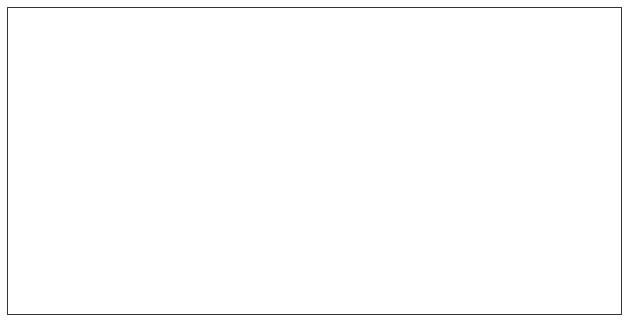

In [6]:
ds_z300=ds_region.sel(isobaricInhPa=300)

data = ds_z300['u'][:,:]
#data, lons = add_cyclic_point(data, coord=ds['longitude'])

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
lons =  ds_z300['longitude']
lats =  ds_z300['latitude']
#lats =  lats[0:28]
#lons=lons[0:28]


In [7]:
# Make a filled contour plot
cs=ax.contourf(lons, lats, data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-90,-70,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(30,45,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
#cbar = plt.colorbar(cs)

cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Zonal wind speed m/s')
plt.title( 'NE U. S. map of zonal winds,  date is 2014120600 ')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed